# Exploratory Data Analysis (EDA) of mobile sales datasey

This dataset comprises of all the models launched by various companies till 2021.
This dataset contains:
- 3114 values
- 11 features

#### Import libraries and basic information about the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data= pd.read_csv('Sales.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [4]:
data.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [5]:
data.describe(include='object')

,Brands,Models,Colors,Memory,Storage,Camera,Mobile
count,3114,3114,3114,3071,3075,3114,3114
unique,17,914,639,26,26,1,928
top,SAMSUNG,iPhone 11,Black,4 GB,64 GB,Yes,Apple iPhone 11
freq,719,36,489,750,774,3114,36


In [6]:
data.describe(include='object')

,Brands,Models,Colors,Memory,Storage,Camera,Mobile
count,3114,3114,3114,3071,3075,3114,3114
unique,17,914,639,26,26,1,928
top,SAMSUNG,iPhone 11,Black,4 GB,64 GB,Yes,Apple iPhone 11
freq,719,36,489,750,774,3114,36


# Data cleaning

### Removing Null values 

In [7]:
data.duplicated().sum()

108

In [8]:
data.drop_duplicates(keep="first", inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
#apply strip to each column
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,512 MB,4 GB,Yes,4.0,5999,5999,SAMSUNG Galaxy S Duos 2,0,0.000000
3108,SAMSUNG,Metro 313,Black,4 MB,2 MB,Yes,4.2,2299,2299,SAMSUNG Metro 313,0,0.000000
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


# Explorartory data analysis

#### 1. Brand wise distribution

In [11]:
brands = data['Brands'].value_counts()
brands = brands.reset_index()
brands.columns = ['Brands', 'Count']
brands

,Brands,Count
0,SAMSUNG,704
1,Apple,324
2,realme,322
3,OPPO,257
4,Nokia,199
5,Xiaomi,198
6,Infinix,150
7,GIONEE,128
8,vivo,124
9,Lenovo,117


Thresold values to show others in piechart

In [12]:
threshold = 110
df_main = brands[brands['Count'] >= threshold].copy()
df_others = brands[brands['Count'] < threshold].copy()
others_count = df_others['Count'].sum()
df_main.loc[len(df_main.index)] = ['Others', others_count]
sm = brands['Count'].sum()

Creating a clor palette for the pie chart.

In [13]:
colors = sns.color_palette("coolwarm", len(df_main))[::-1]


Creating a explode list that will help to hightlight the top 2 mobile brands of the dataset.

In [14]:
explode = explode = [0] * len(df_main)
explode[0]=0.2
explode[1]=0.1

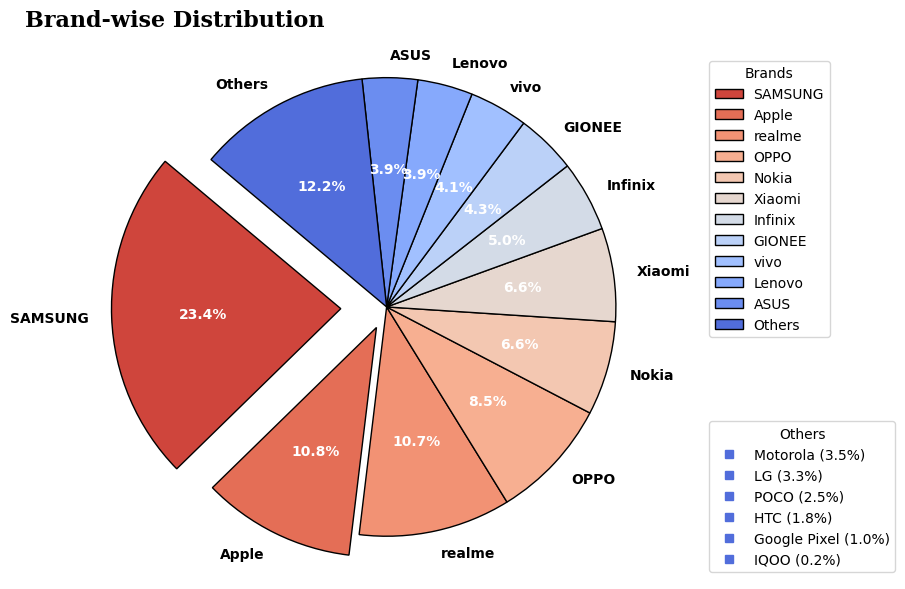

In [15]:
fig, ax = plt.subplots(figsize=(9, 6))

# Create the pie chart with custom colors and explode values
wedges, texts, autotexts = ax.pie(
    df_main['Count'],
    labels=df_main['Brands'],
    explode=explode,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(edgecolor='black') 
)

# legends
percentages = [f'{p:.1f}%' for p in (df_others['Count'] / sm * 100)]
legend_labels = [f'{label} ({percentage})' for label, percentage in zip(df_others['Brands'], percentages)]
legend1 = ax.legend(wedges, df_main['Brands'], title="Brands", loc="upper left", bbox_to_anchor=(1, 1))
other_handles = [plt.Line2D([0], [0], marker='s', linestyle='None', color=colors[-1]) for _ in df_others['Brands']]
legend2 = ax.legend(other_handles, legend_labels, title="Others", loc="lower left", bbox_to_anchor=(1, 0))
ax.add_artist(legend1)

# Customize font properties for better readability
plt.setp(autotexts, size=10, weight='bold', color='white')
plt.setp(texts, size=10, weight='bold')


plt.title("Brand-wise Distribution", pad=20 , loc="left" ,fontdict={'family':'serif',
                                                                    'color':'Black',
                                                                    'weight':'bold',
                                                                    'size': 16,
                                                                    'stretch':'expanded'})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


We can see the majority of the products are from the brand "Samsung" followed by "Apple" and "Realme".

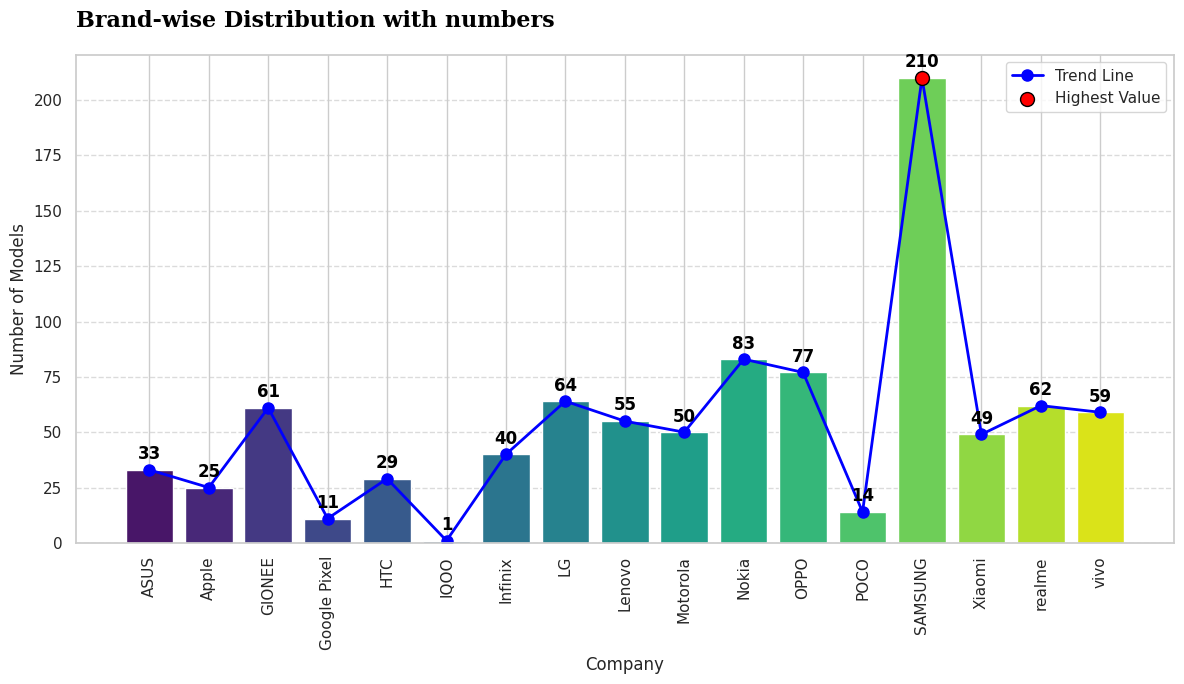

In [16]:
# Calculate the number of unique models by company
models_of_company = data.groupby('Brands')['Models'].nunique()

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Title of the plot
plt.title("Brand-wise Distribution with numbers", pad=20 , loc="left" ,fontdict={'family':'serif',
                                                                    'color':'Black',
                                                                    'weight':'bold',
                                                                    'size': 16,
                                                                    'stretch':'expanded'})


# Create the bar plot with a custom color palette
custom_palette = sns.color_palette("viridis", len(models_of_company))

# Create the bar plot
bars = plt.bar(models_of_company.index, models_of_company.values, color=custom_palette)

# Add a curve line
x = np.arange(len(models_of_company))
plt.plot(x, models_of_company.values, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Trend Line')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval+3, f'{yval}', va='bottom', ha='center', fontsize=12, color='black', weight='bold')

# Mark the highest value
max_value = models_of_company.max()
max_index = models_of_company.idxmax()
plt.scatter(max_index, max_value, color='red', s=100, edgecolor='black', zorder=5, label='Highest Value')

plt.legend()
plt.xlabel('Company')
plt.ylabel('Number of Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

We can see **samsung** has the most number of models in the dataset. Hence samung is the most popular brand in the dataset. 

This signifies that either samsung have most number of models releases per year or each model of samsung has multiple variants.

### 2. Color wise distribution 

In [17]:
color_count = data.Colors.value_counts()

color_count=color_count.head(10)
color_count


Colors
Black             465
Gold              187
White             149
Blue              134
Silver             98
Red                71
Grey               45
Midnight Black     35
Space Grey         31
Rose Gold          29
Name: count, dtype: int64

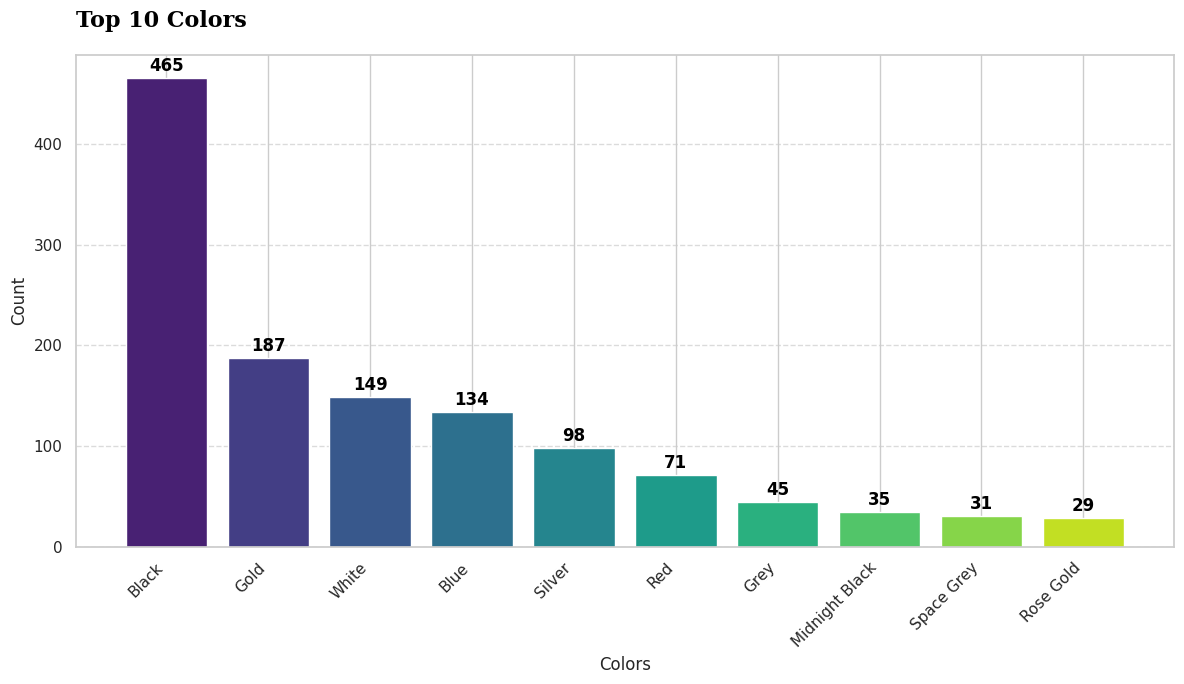

In [18]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

plt.title("Top 10 Colors", pad=20 , loc="left" ,fontdict={'family':'serif',
                                                        'color':'Black',
                                                        'weight':'bold',
                                                        'size': 16,
                                                        'stretch':'expanded'})


custom_palette = sns.color_palette("viridis", len(color_count))

# Create the bar plot
bars = plt.bar(color_count.index, color_count.values, color=custom_palette)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval+3, f'{yval}', va='bottom', ha='center', fontsize=12, color='black', weight='bold')
# Customize x-axis and y-axis labels
plt.xlabel('Colors')
plt.ylabel('Count')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### 3. Mean rating of each brand

In [19]:
brand_rating = data[["Brands","Rating"]]
brand_rating = brand_rating.dropna()
brand_rating

,Brands,Rating
0,SAMSUNG,4.3
1,Nokia,3.8
2,realme,4.4
3,Infinix,4.2
4,Apple,4.6
...,...,...
3104,LG,3.8
3107,SAMSUNG,4.0
3108,SAMSUNG,4.2
3109,POCO,4.4


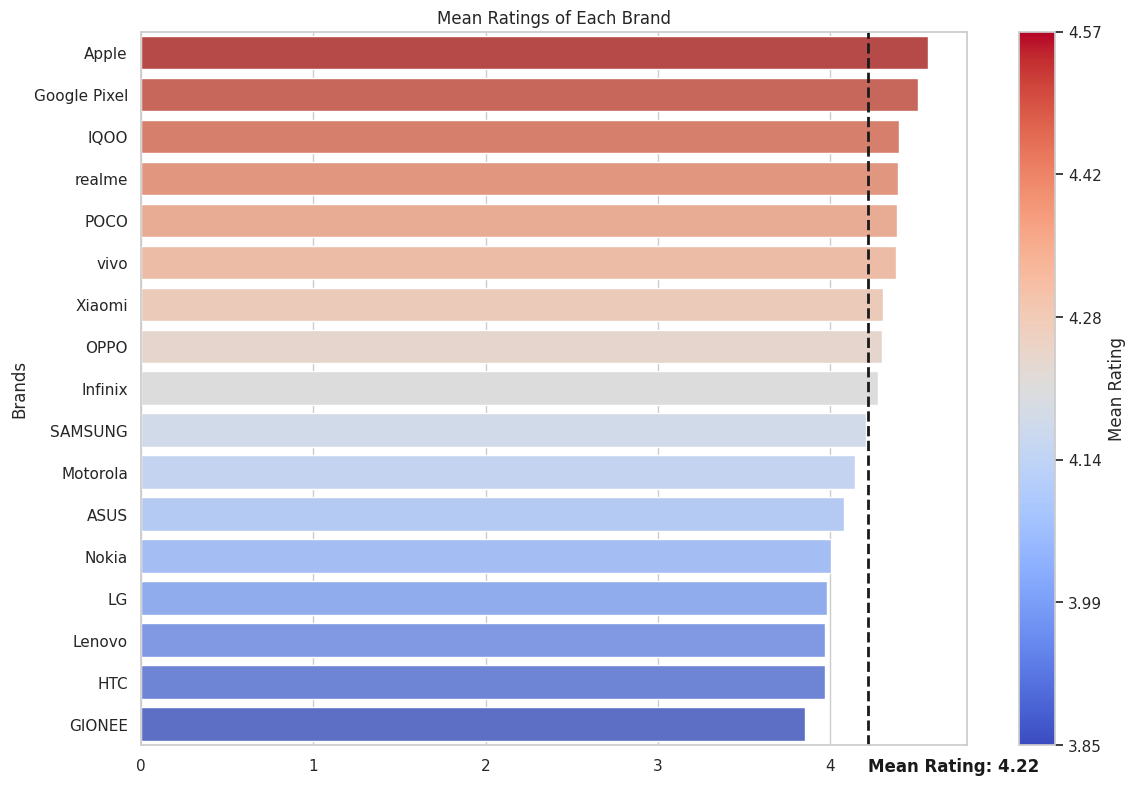

In [20]:
# Calculate mean rating for each brand and sort
Mean_agg_rating = brand_rating.groupby('Brands').mean('Rating')
Mean_agg_rating = Mean_agg_rating.Rating.sort_values(ascending=False)

# Calculate the cutoff value
cutoff_value = Mean_agg_rating.mean()  # Set your cutoff value

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Title of the plot
plt.title("Mean Ratings of Each Brand")

# Create the horizontal bar plot with a custom color palette
custom_palette = sns.color_palette("coolwarm", len(Mean_agg_rating))[::-1]
sns.barplot(y=Mean_agg_rating.index, x=Mean_agg_rating.values, hue=Mean_agg_rating.index, palette=custom_palette, dodge=False, legend=False)


# Draw the cutoff line
plt.axvline(x=cutoff_value, color='k', linestyle='--', linewidth=2)

# Add a label for the cutoff line
plt.text(cutoff_value, len(Mean_agg_rating), f'Mean Rating: {cutoff_value:.2f}', color='k', va='center', fontsize=12, weight='bold')
# plt.text ( x,y, text, color, va, fontsize, weight)

# Add a color bar
norm = plt.Normalize(Mean_agg_rating.min(), Mean_agg_rating.max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Mean Rating')
cbar.set_ticks(np.linspace(Mean_agg_rating.min(), Mean_agg_rating.max(), 6))
cbar.set_ticklabels([f'{x:.2f}' for x in np.linspace(Mean_agg_rating.min(), Mean_agg_rating.max(), 6)])

# Show the plot
plt.tight_layout()
plt.show()

We can see apple is the most rated brand in the dataset. This signifies that apple has the most number of models with higher ratings.

The reasons could be that apple has the best pricing strategy or the best quality of the products, or it is reaping the benefits of the brand name. 

We will see this in the upcoming price discount analysis.

### 4. Price Spread in the dataset

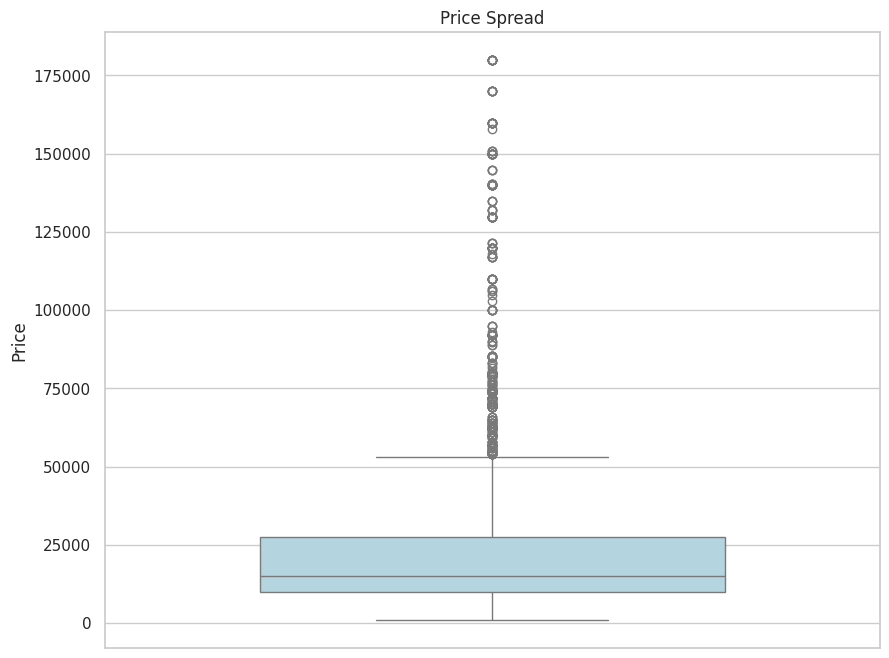

In [21]:
plt.figure(figsize=(10, 8))
plt.title('Price Spread')

sns.boxplot(y=data['Selling Price'], color='lightblue', width=0.6, orient='v')

plt.ylabel('Price')
plt.xlabel('')
plt.show()

### 5. Top 5 brands with highest discounts and with their selling price

In [22]:
mobile_discount = data[["Mobile","Selling Price","Original Price","Discount"]]
mobile_discount

,Mobile,Selling Price,Original Price,Discount
0,SAMSUNG GALAXY M31S,19330,20999,1669
1,Nokia 3.2,10199,10199,0
2,realme C2,6999,7999,1000
3,Infinix Note 5,12999,12999,0
4,Apple iPhone 11,49900,49900,0
...,...,...,...,...
3107,SAMSUNG Galaxy S Duos 2,5999,5999,0
3108,SAMSUNG Metro 313,2299,2299,0
3109,POCO M4 Pro 5G,16999,19999,3000
3112,Apple iPhone 13 Pro,119900,119900,0


In [23]:
mobile_discount.sort_values("Discount") #oppo cheating customers

,Mobile,Selling Price,Original Price,Discount
2137,OPPO A5s,12990,4990,-8000
3113,GIONEE F9,7900,7900,0
1270,Apple iPhone 12 Pro Max,119900,119900,0
1269,OPPO F3 Plus,22990,22990,0
2264,Xiaomi Redmi Y3,9950,9950,0
...,...,...,...,...
507,LG Wing,29999,80000,50001
306,ASUS ROG,26499,83999,57500
848,Motorola Razr 5G,89999,149999,60000
589,Motorola Razr,74999,149999,75000


In [24]:
top_5_mobiles = mobile_discount.sort_values("Discount",ascending=False).head(5)
top_5_mobiles = top_5_mobiles[['Mobile','Original Price','Discount']]
top_5_mobiles


,Mobile,Original Price,Discount
711,Motorola Razr,149999,75000
589,Motorola Razr,149999,75000
848,Motorola Razr 5G,149999,60000
306,ASUS ROG,83999,57500
507,LG Wing,80000,50001


In [25]:
# print all data where model is "Motorola Razr"
data[data['Mobile'] == 'Motorola Razr']

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
589,Motorola,Razr,Gold,6 GB,128 GB,Yes,3.8,74999,149999,Motorola Razr,75000,50.000333
711,Motorola,Razr,Black,6 GB,128 GB,Yes,3.8,74999,149999,Motorola Razr,75000,50.000333


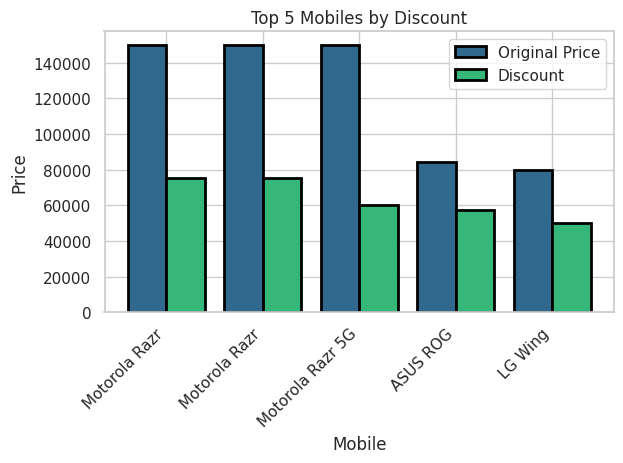

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Define the bar width and index positions
bar_width = 0.4
index = np.arange(len(top_5_mobiles['Mobile']))

# Create a color palette
palette = sns.color_palette("viridis", n_colors=2)  # Choose a palette and number of colors

# Create the figure and axes
fig, ax = plt.subplots()

# Create the bars for Original Price and Discount using the Seaborn color palette
bar1 = ax.bar(index, top_5_mobiles['Original Price'], bar_width, color=palette[0], edgecolor='black', linewidth=2, label='Original Price')
bar2 = ax.bar(index + bar_width, top_5_mobiles['Discount'], bar_width, color=palette[1], edgecolor='black', linewidth=2, label='Discount')

# Set the labels and title
ax.set_xlabel('Mobile')
ax.set_ylabel('Price')
ax.set_title('Top 5 Mobiles by Discount')

# Set the x-ticks and labels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_5_mobiles['Mobile'], rotation=45, ha='right')

# Adding a legend
ax.legend()

# Apply tight layout
plt.tight_layout()

# Show the plot
plt.show()


We can see motorola leads the chart with the highest discount rate ASUS and LG

Does the brands give this kind of discount or is it just a one time thing?

### 6. Brand wise discount distribution

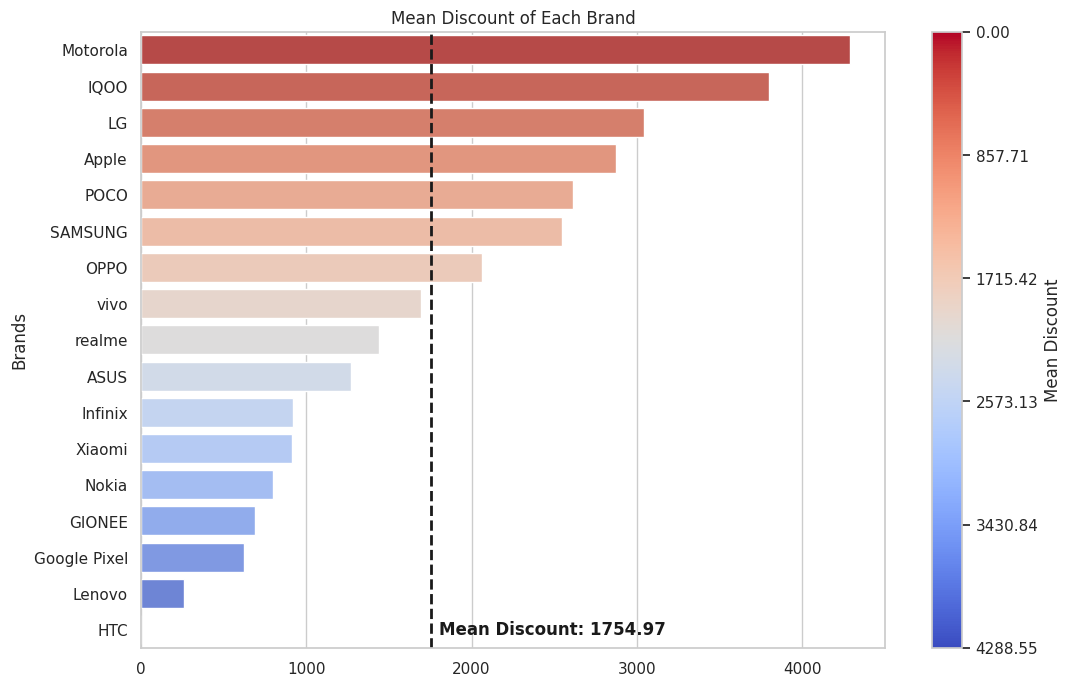

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming data is already defined as a DataFrame and contains the 'Brands' and 'Discount' columns
# Replace it with your actual DataFrame

# Calculate mean discount for each brand and sort
Mean_agg_discount = data.groupby('Brands').mean('Discount')
Mean_agg_discount = Mean_agg_discount.Discount.sort_values(ascending=False)

# Calculate the cutoff value
cutoff_value = Mean_agg_discount.mean()  # Set your cutoff value

# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
plt.title("Mean Discount of Each Brand")

# Create the bar plot without hue
custom_palette = sns.color_palette("coolwarm", len(Mean_agg_discount))[::-1]  # Reverse the palette to match the sorted order
sns.barplot(x=Mean_agg_discount.values, y=Mean_agg_discount.index, palette=custom_palette, hue=Mean_agg_discount.index, dodge=False, legend=False)

# Draw the cutoff line
plt.axvline(x=cutoff_value, color='k', linestyle='--', linewidth=2)

# Optionally, add a label for the cutoff line
plt.text(cutoff_value+50, len(Mean_agg_discount) - 1, f'Mean Discount: {cutoff_value:.2f}', color='k', va='center', fontsize=12, weight='bold')

# Add a color bar
norm = plt.Normalize(Mean_agg_discount.min(), Mean_agg_discount.max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Mean Discount')
cbar.set_ticks(np.linspace(Mean_agg_discount.min(), Mean_agg_discount.max(), 6))
cbar.set_ticklabels([f'{x:.2f}' for x in np.linspace(Mean_agg_discount.min(), Mean_agg_discount.max(), 6)][::-1])  # Reverse the tick labels

# Show the plot
plt.show()


We can see that the most customer friendly brand is maybe *Moto* as it has the highest discount rate but does it have a reasonable selling price?

As per our previous chart, indeed *Motorola* and *LG* are in the top position in terms of discount rate, but *Asus* mean discount rate is not always the highest.

### 7. Mean selling price of each brand

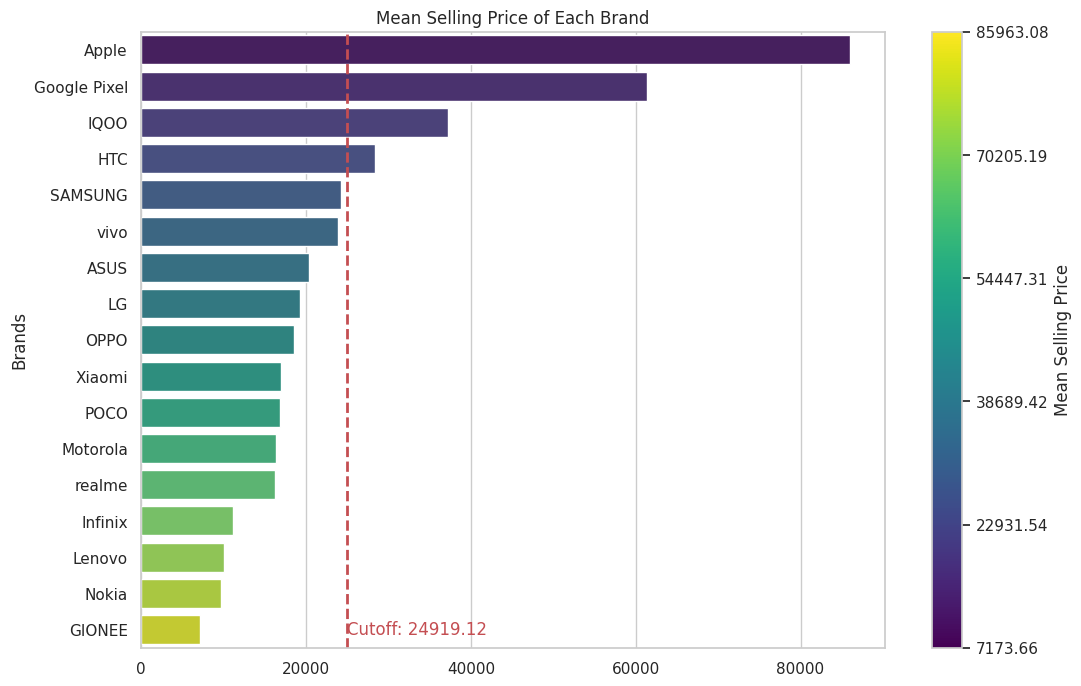

In [28]:
# Calculate mean selling price for each brand and sort
Mean_agg_saleprice = data.groupby('Brands').mean('Selling Price')
Mean_agg_saleprice = Mean_agg_saleprice['Selling Price'].sort_values(ascending=False)

# Calculate the cutoff value
cutoff_value = Mean_agg_saleprice.mean()  # Set your cutoff value

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Title of the plot
plt.title("Mean Selling Price of Each Brand")

# Create the horizontal bar plot
custom_palette = sns.color_palette("viridis", len(Mean_agg_saleprice))
sns.barplot(y=Mean_agg_saleprice.index, x=Mean_agg_saleprice.values, palette=custom_palette, hue=Mean_agg_saleprice.index, dodge=False, legend=False)

# Draw the cutoff line
plt.axvline(x=cutoff_value, color='r', linestyle='--', linewidth=2)

# Optionally, add a label for the cutoff line
plt.text(cutoff_value, len(Mean_agg_saleprice) - 1, f'Cutoff: {cutoff_value:.2f}', color='r', va='center')

# Add a color bar
norm = plt.Normalize(Mean_agg_saleprice.min(), Mean_agg_saleprice.max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Mean Selling Price')
cbar.set_ticks(np.linspace(Mean_agg_saleprice.min(), Mean_agg_saleprice.max(), 6))
cbar.set_ticklabels([f'{x:.2f}' for x in np.linspace(Mean_agg_saleprice.min(), Mean_agg_saleprice.max(), 6)])

# Show the plot
plt.show()

We can see in terms of selling price *Motorola* is very low in the list making it very consumer friendly, along with gionee and nokia 

Although Gionee, Nokia, Lenovo have the least selling price, their ratings are also lower compared to other brands.

On contrary to this, Apple has the highest selling price but also has the highest ratings. Hence indeed Apple reaps the benefit of being a luxury brand.

### 8. Selling price trends 

Does the most expensive mobiles have the highest ratings? What is the ratings of the cheapest mobiles?

In [69]:
selling_price = data[["Mobile","Selling Price"]].sort_values("Selling Price",ascending=False)
sellingprice_agg_mobile = selling_price.groupby("Mobile").mean("Selling Price").sort_values("Selling Price",ascending=False)
rating = data[["Mobile","Rating"]].sort_values("Rating",ascending=False)
rating_agg_mobile = rating.groupby("Mobile").mean("Rating")

In [98]:
t5ag = sellingprice_agg_mobile.head(5)
#t5ag
l5ag = sellingprice_agg_mobile.tail(5)[::-1]
#l5ag
t5sp = selling_price.head(10)
#t5sp
l5sp = selling_price.tail(5)[::-1]
#l5sp

In [93]:
l5sp

,Mobile,Selling Price
1501,Nokia 105,1000
2054,Nokia Ta -1010/105,1000
1338,SAMSUNG GT 1200 R/I/M,1099
2487,GIONEE S96,1099
978,GIONEE L700,1099


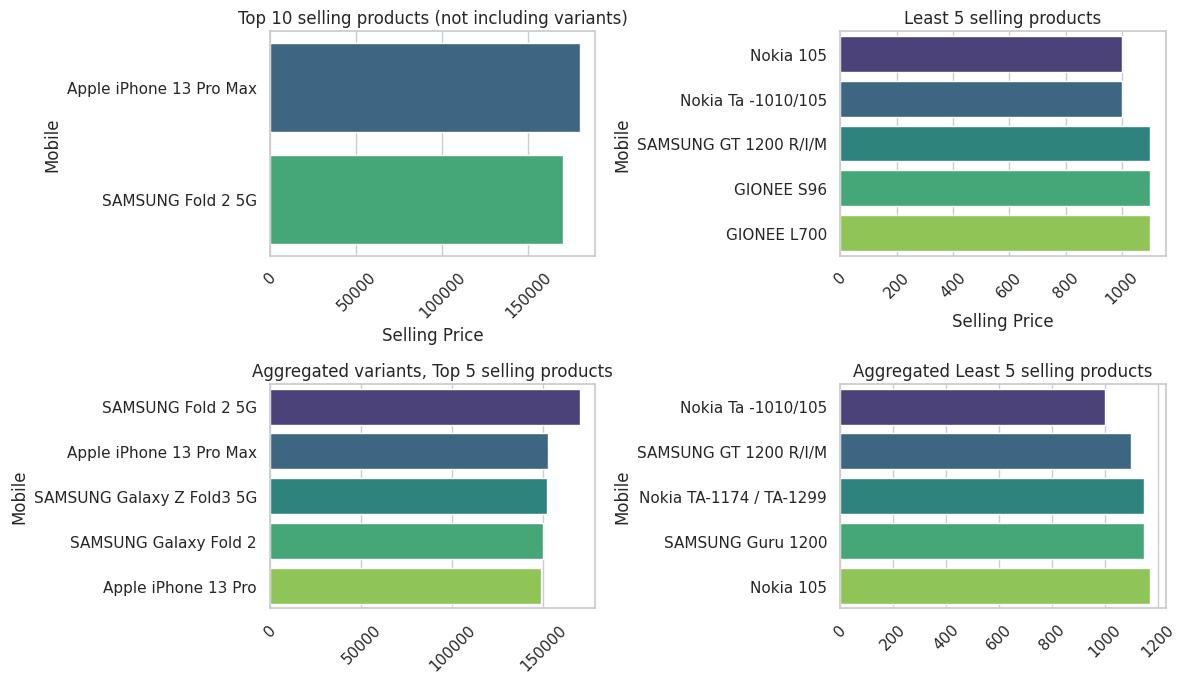

In [99]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

# Top 5 selling products
plt.subplot(221)
sns.barplot(y=t5sp.Mobile, x=t5sp['Selling Price'], hue=t5sp.Mobile, palette='viridis', dodge=False, legend=False)
plt.title("Top 10 selling products (not including variants)")
plt.xticks(rotation=45)

# Least 5 selling products
plt.subplot(222)
sns.barplot(y=l5sp.Mobile, x=l5sp['Selling Price'], hue=l5sp.Mobile, palette='viridis', dodge=False, legend=False)
plt.title("Least 5 selling products")
plt.xticks(rotation=45)

# Aggregated Top 5 selling products
plt.subplot(223)
sns.barplot(y=t5ag.index, x=t5ag['Selling Price'].values, hue=t5ag.index, palette='viridis', dodge=False, legend=False)
plt.title("Aggregated variants, Top 5 selling products")
plt.xticks(rotation=45)

# Aggregated Least 5 selling products
plt.subplot(224)
sns.barplot(y=l5ag.index, x=l5ag['Selling Price'].values, hue=l5ag.index, palette='viridis', dodge=False, legend=False)
plt.title("Aggregated Least 5 selling products")
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

We can find an interesting oberservation here. 
- As per previous knowledge, Apple has the highest selling price phones, and only 3 phone models are in the top 20 most expensive phones.
- Samsungs also is in the list of least selling priced phones, which shows the spread of samsung phones in the market.


### Heatmap among all the features

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
def toMB(value):
    try :
        if 'MB' in value:
            return int(float(value.replace('MB', '').strip()))
        elif 'GB' in value:
            return int(float(value.replace('GB', '').strip()) * 1024)
        elif 'TB' in value:
            return int(float(value.replace('TB', '').strip()) * 1024 * 1024)
    except:
        print(value)
        return value
    
def conversiontoMB(data):
    data_converted = data.copy()
    data_converted['Memory'] = data['Memory'].dropna().apply(toMB)
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 32 GB", "32 GB")
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 16 GB", "16 GB")
    data_converted['Storage'] = data_converted['Storage'].dropna().apply(toMB)
    return data_converted


In [34]:
data_converted = conversiontoMB(data)

data_converted = data_converted.dropna().drop(columns=['Camera'])

categorical_columns = data_converted.select_dtypes(include=['object']).columns

ordinal_encoder = OrdinalEncoder()

data_converted[categorical_columns] = ordinal_encoder.fit_transform(data_converted[categorical_columns])

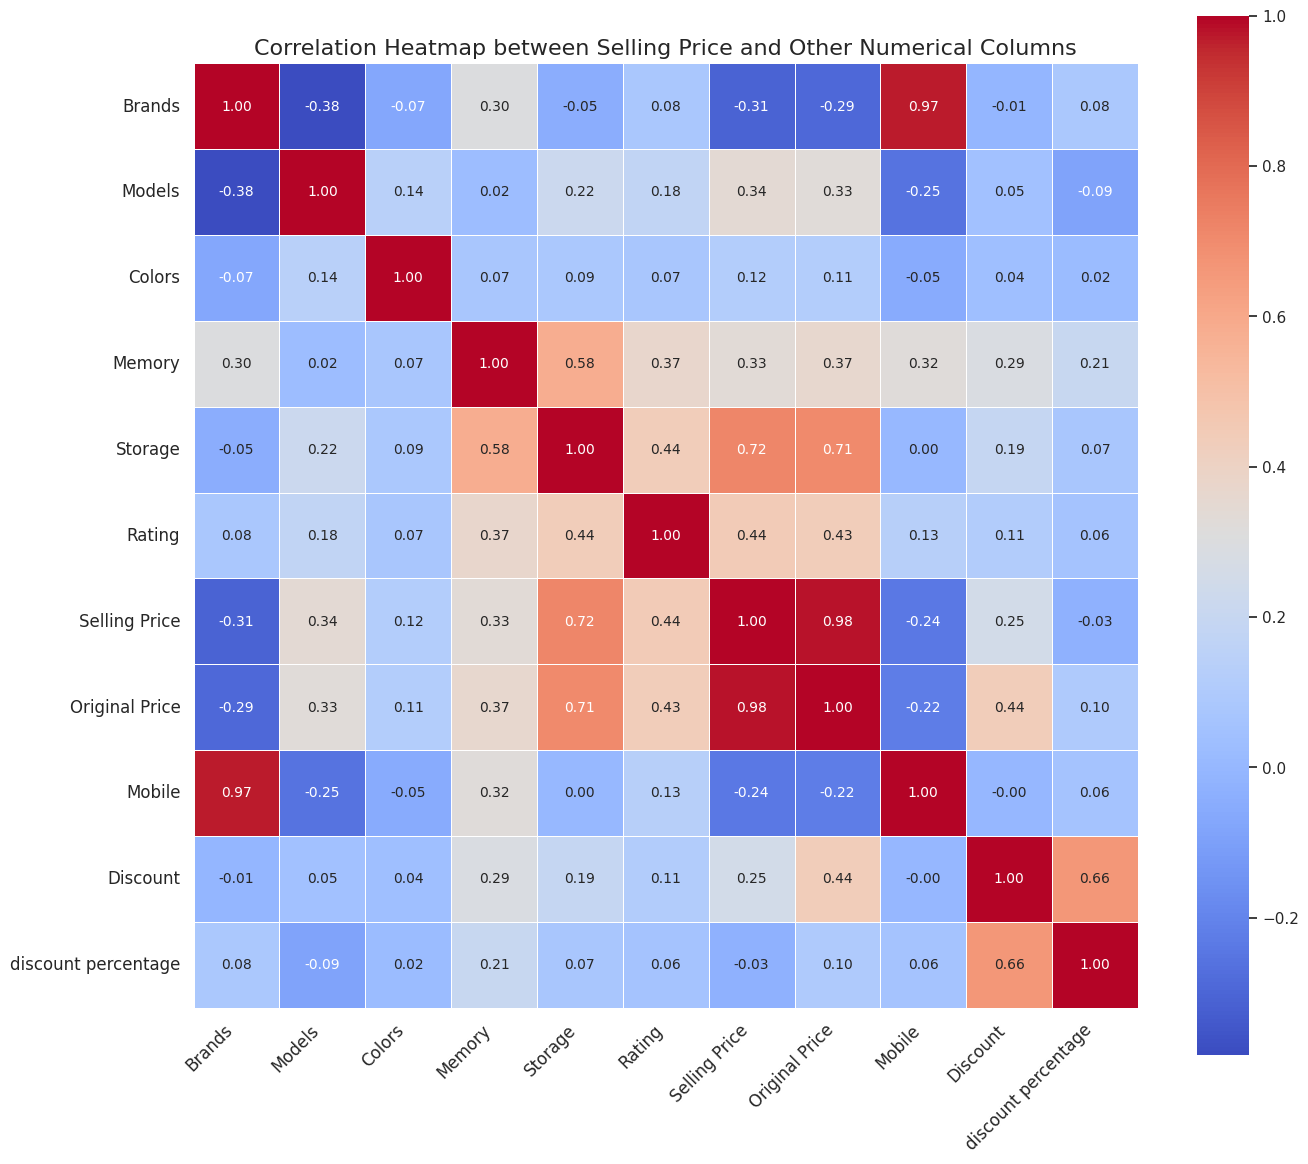

In [35]:
# Set the Seaborn theme for better aesthetics
sns.set_theme(style="white")

# Create a larger figure
plt.figure(figsize=(14, 12))  # Adjust the size as needed

# Create the heatmap with improved readability
ax = sns.heatmap(
    data_converted.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 10},  # Adjust the annotation font size
    linewidths=.5,  # Add separation between cells
    square=True  # Ensure cells are square
)

# Set title and adjust labels
plt.title('Correlation Heatmap between Selling Price and Other Numerical Columns', fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis labels

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
color_vs_price = data[['Colors','Selling Price']].sort_values(by='Selling Price',ascending=False)
color_vs_price

,Colors,Selling Price
1185,Sierra Blue,179900
813,Graphite,179900
2032,Graphite,179900
903,Silver,179900
1285,Silver,179900
...,...,...
978,Black,1099
2487,Black,1099
1338,Black,1099
2054,Black,1000


In [37]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'data' is your original DataFrame

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'Colors' column
color_vs_price['Color_Encoded'] = ordinal_encoder.fit_transform(color_vs_price[['Colors']])
color_vs_price



,Colors,Selling Price,Color_Encoded
1185,Sierra Blue,179900,510.0
813,Graphite,179900,253.0
2032,Graphite,179900,253.0
903,Silver,179900,512.0
1285,Silver,179900,512.0
...,...,...,...
978,Black,1099,45.0
2487,Black,1099,45.0
1338,Black,1099,45.0
2054,Black,1000,45.0


In [38]:
correlation = color_vs_price['Color_Encoded'].corr(color_vs_price['Selling Price'])
correlation


0.13910995469690662

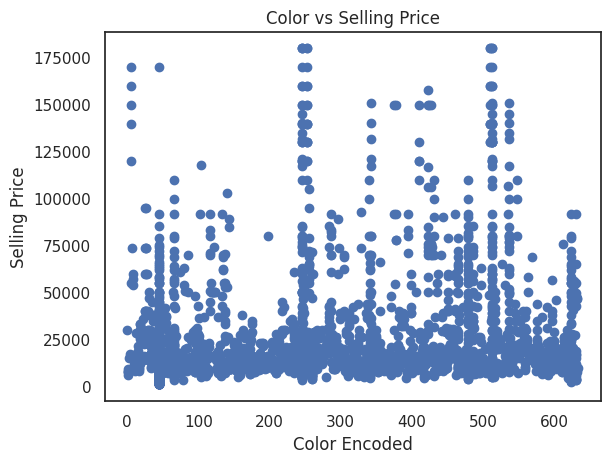

In [39]:
color_vs_price.sort_values(by='Color_Encoded', inplace=True)
plt.figure()
plt.scatter(color_vs_price['Color_Encoded'], color_vs_price['Selling Price'])
plt.xlabel('Color Encoded')
plt.ylabel('Selling Price')
plt.title('Color vs Selling Price')
plt.show()

In [40]:
correlation = data['Selling Price'].corr(data['Discount'])
correlation

0.19083919300202232

In [41]:
correlation = data['Selling Price'].corr(data['discount percentage'])
correlation

-0.06459367889478382

In [42]:
#data['Selling Price'].mean()